In [44]:
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage 
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [51]:
def load_image_box(image_name):
    image_path = image_name+".png"
    meta_path = image_name+".meta"
    image = cv2.imread(image_path)
    with open(meta_path, 'r') as f:
        meta = json.load(f)
    bboxes = meta["groundtruth"]["box"]
    return image, bboxes

def load_image_box_for_aug(image, box):
    bbs = BoundingBoxesOnImage([
                                BoundingBox(x1=box[0], x2=box[2], y1=box[1], y2=box[3])
                                ], shape=image.shape)
    return image, bbs

In [52]:
image, bboxes = load_image_box("Helipad_00076")

In [53]:
image, box = load_image_box_for_aug(image, bboxes[0])

In [16]:
def display_image_with_bb(image, box):
    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Create a Rectangle patch
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    
    plt.show()

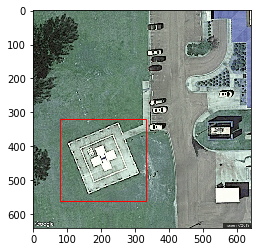

In [54]:
display_image_with_bb(image, bboxes[0])

In [93]:
aug = iaa.Sometimes(5/6,iaa.OneOf(
                                            [
                                                iaa.Fliplr(1), 
                                                iaa.Flipud(1), 
                                                iaa.Affine(rotate=(-45, 45)), 
                                                iaa.Affine(rotate=(-90, 90)), 
                                                iaa.Affine(scale=(0.5, 1.5)),
                                                iaa.GaussianBlur(sigma=(0.0, 3.0))
                                             ]
                                        )
                                   )

In [94]:
images = np.array(
    [image for _ in range(32)],
    dtype=np.uint8
)

In [95]:
image_aug, box_aug = aug(image=image, bounding_boxes=box)

In [96]:
box_aug

BoundingBoxesOnImage([BoundingBox(x1=309.0000, y1=318.0000, x2=560.0000, y2=562.0000, label=None)], shape=(640, 640, 3))

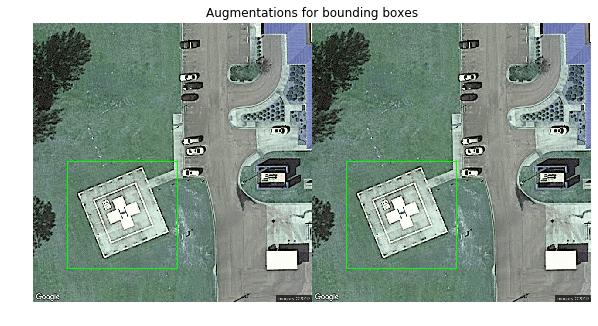

In [106]:
image_aug, box_aug = aug(image=image, bounding_boxes=box)

side_by_side = np.hstack([
    box.draw_on_image(image, size=2), # blend the original image with bounding box
    box_aug.draw_on_image(image_aug, size=2) # blend the augmented image with bounding box
])

# Plot with matplotlib imshow()
fig, ax = plt.subplots(figsize=(10, 7))
ax.axis('off')
plt.title('Augmentations for bounding boxes')
ax.imshow(side_by_side)

https://github.com/matterport/Mask_RCNN/issues/1015
https://www.kaggle.com/c/data-science-bowl-2018/discussion/53495
https://github.com/matterport/Mask_RCNN/issues/768
https://medium.com/@a.karazhay/guide-augment-images-and-multiple-bounding-boxes-for-deep-learning-in-4-steps-with-the-notebook-9b263e414dac
https://imgaug.readthedocs.io/en/latest/source/overview_of_augmenters.html

https://towardsdatascience.com/data-augmentation-for-deep-learning-4fe21d1a4eb9